## Corporate Neighborhood Recommender

### Introduction

A corporation has offices in Boston, Chicago, Atlanta, and Denver.  Employees often transfer between the locations, with stays typically lasting 2 years.  To ease the transition, the human resources department would like to be able to recommend areas to look for housing based on where the employee previously lived.
By analyzing the area where the employee previously lived, the HR department hopes to be able to recommend an area where the employee will feel "right at home".

## Data

On the assumption the employee is happy with the area where they currently live, HR hopes to find a similar area near the office they will be moving to.  "Similar" in this case means it has the same types of venues (shopping, dining, entertainment, etc) nearby. <a href="https://foursquare.com/">Foursquare</a> will provide venue data both for the employees current location and the areas around the office they will be moving to.

We will also need a source to identify specific neighborhoods around the offices.  <strike>This may include scraping Wikipedia.</strike> Luckily Chicago, Boston, Atlanta, and Denver all supply this data in geojson and / or shapefile formats.

In [2]:
!pip install geopy
!pip install folium
!pip install geopandas
!pip install descartes

    100% |████████████████████████████████| 102kB 15.3MB/s 
  Running setup.py bdist_wheel for geographiclib ... done
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/99/45/d1/14954797e2a976083182c2e7da9b4e924509e59b6e5c661061
Successfully built geographiclib
    100% |████████████████████████████████| 92kB 9.9MB/s 
    100% |████████████████████████████████| 901kB 13.8MB/s 
    100% |████████████████████████████████| 17.9MB 2.2MB/s 
    100% |████████████████████████████████| 1.5MB 15.7MB/s 
  Running setup.py bdist_wheel for munch ... done
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [3]:
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
import requests

from geopy.geocoders import Nominatim
import folium
import geopandas as gpd
from pandas.io.json import json_normalize
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Boston, MA

In [4]:
gdf_boston=gpd.read_file('http://bostonopendata-boston.opendata.arcgis.com/datasets/3525b0ee6e6b427f9aab5d0a1d0a1a28_0.geojson')
gdf_boston.head()

,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,geometry
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,(POLYGON ((-71.12592717485386 42.2720131079574...
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,POLYGON ((-71.10499218689807 42.32610168280807...
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.0904343142608 42.33576996328494,..."
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,POLYGON ((-71.09810894210769 42.33673037764089...
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,POLYGON ((-71.06662924918761 42.34878268384542...


In [5]:
#!pip install descartes
import descartes

SW Corner: 42.227919776914206 , -71.19124972941866
NE Corner: 42.3969861844251 , -70.92278042484764


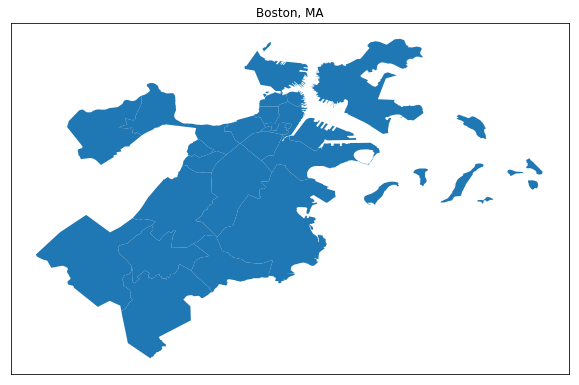

In [15]:
gdf_boston.plot(figsize=(10,8))
plt.title('Boston, MA')
plt.xticks([])
plt.yticks([])
plt.savefig('Boston_raw.png')
print('SW Corner:',gdf_boston.total_bounds[1],',',gdf_boston.total_bounds[0])
print('NE Corner:',gdf_boston.total_bounds[3],',',gdf_boston.total_bounds[2])

In [16]:
df_boston = pd.DataFrame(columns=['Metro','Neighborhood','Latitude','Longitude'])
df_boston['Neighborhood'] = gdf_boston['Name']
df_boston['Metro'] = 'Boston'
df_boston['Latitude'] = gdf_boston.centroid.y
df_boston['Longitude'] = gdf_boston.centroid.x
df_boston.head()

,Metro,Neighborhood,Latitude,Longitude
0,Boston,Roslindale,42.282524,-71.126663
1,Boston,Jamaica Plain,42.307770,-71.115097
2,Boston,Mission Hill,42.331741,-71.102607
3,Boston,Longwood,42.338609,-71.105103
4,Boston,Bay Village,42.349103,-71.069032


## Chicago, IL

In [17]:
gdf_chicago = gpd.read_file('https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=GeoJSON')
gdf_chicago.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,(POLYGON ((-87.60914087617894 41.8446925026539...
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,(POLYGON ((-87.59215283879394 41.8169293462668...
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,(POLYGON ((-87.62879823733725 41.8018930336891...
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,(POLYGON ((-87.6067081256125 41.81681377057218...
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,(POLYGON ((-87.59215283879394 41.8169293462668...


In [ ]:
pd.reset_option('max_rows')


SW Corner: 41.644543121506054 , -87.9401140825235
NE Corner: 42.023038586147585 , -87.52413710389523


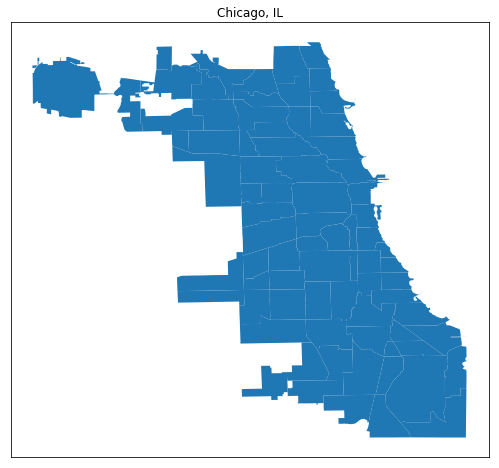

In [18]:
gdf_chicago.plot(figsize=(10,8))
plt.title('Chicago, IL')
plt.xticks([])
plt.yticks([])
plt.savefig('Chicago_raw.png')
print('SW Corner:',gdf_chicago.total_bounds[1],',',gdf_chicago.total_bounds[0])
print('NE Corner:',gdf_chicago.total_bounds[3],',',gdf_chicago.total_bounds[2])

In [19]:
df_chicago = pd.DataFrame(columns=['Metro','Neighborhood','Latitude','Longitude'])
df_chicago['Neighborhood'] = gdf_chicago['community']
df_chicago['Metro'] = 'Chicago'
df_chicago['Latitude'] = gdf_chicago.centroid.y
df_chicago['Longitude'] = gdf_chicago.centroid.x
df_chicago.head()

,Metro,Neighborhood,Latitude,Longitude
0,Chicago,DOUGLAS,41.835118,-87.618678
1,Chicago,OAKLAND,41.823750,-87.603216
2,Chicago,FULLER PARK,41.809085,-87.632425
3,Chicago,GRAND BOULEVARD,41.812949,-87.617860
4,Chicago,KENWOOD,41.808916,-87.596184


## Atlanta, GA

In [20]:
#gdf_atlanta = gpd.read_file('https://opendata.arcgis.com/datasets/34520575dfc34b8cac783caff702b8cc_58.geojson')
gdf_atlanta = gpd.read_file('https://opendata.arcgis.com/datasets/297d3d69d8ab4c6ba5f9264ad5e75c0a_3.geojson')
gdf_atlanta.head()

,OBJECTID,LOCALID,NAME,GEOTYPE,FULLFIPS,LEGALAREA,EFFECTDATE,ENDDATE,SRCREF,ACRES,SQMILES,OLDNAME,NPU,CREATED_USER,CREATED_DATE,LAST_EDITED_USER,LAST_EDITED_DATE,GLOBALID,geometry
0,148,None,Atlanta University Center,Neighborhood,None,None,None,None,None,331.57,0.52,Atlanta University,T,None,None,GIS,2018-05-15T13:24:10,{D6CAF694-B83F-4CB9-B351-CA3E3145D0C7},POLYGON ((-84.40279850020488 33.75464936754819...
1,149,None,Hunter Hills,Neighborhood,None,None,None,None,None,322.58,0.50,Hunter Hills,K,None,None,GIS,2018-05-15T13:24:10,{8A4F3C84-CCC3-478C-82BA-7E4174935428},POLYGON ((-84.43297031384785 33.76355789428761...
2,150,None,Bankhead,Neighborhood,None,None,None,None,None,416.09,0.65,Bankhead,K,None,None,GIS,2018-05-15T13:24:10,{70303C29-B16F-4E33-9FEC-A33B2244D3AB},POLYGON ((-84.41735255481318 33.77561201010109...
3,151,None,English Avenue,Neighborhood,None,None,None,None,None,519.00,0.81,English Avenue,L,None,None,GIS,2018-05-15T13:24:10,{9B6F9DF9-B38E-46FB-993B-4D1DA42AC049},POLYGON ((-84.41445356588959 33.78125523391933...
4,152,None,Adair Park,Neighborhood,None,None,None,None,None,289.28,0.45,Adair Park,V,None,None,GIS,2018-05-15T13:24:10,{D8FD5CB2-4D90-4EEB-A33A-B52E6D66E345},POLYGON ((-84.40818952563748 33.73928574884914...


SW Corner: 33.64799221398052 , -84.55085388651612
NE Corner: 33.88686973391221 , -84.28962468321288


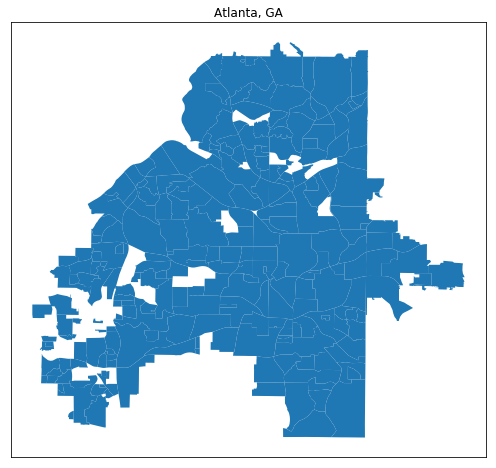

In [21]:
gdf_atlanta.plot(figsize=(10,8))
plt.title('Atlanta, GA')
plt.xticks([])
plt.yticks([])
plt.savefig('Atlanta_raw.png')
print('SW Corner:',gdf_atlanta.total_bounds[1],',',gdf_atlanta.total_bounds[0])
print('NE Corner:',gdf_atlanta.total_bounds[3],',',gdf_atlanta.total_bounds[2])

In [22]:
gdf_atlanta.columns

Index(['OBJECTID', 'LOCALID', 'NAME', 'GEOTYPE', 'FULLFIPS', 'LEGALAREA',
       'EFFECTDATE', 'ENDDATE', 'SRCREF', 'ACRES', 'SQMILES', 'OLDNAME', 'NPU',
       'CREATED_USER', 'CREATED_DATE', 'LAST_EDITED_USER', 'LAST_EDITED_DATE',
       'GLOBALID', 'geometry'],
      dtype='object')

In [23]:
df_atlanta = pd.DataFrame(columns=['Metro','Neighborhood','Latitude','Longitude'])
df_atlanta['Neighborhood'] = gdf_atlanta['NAME']
df_atlanta['Metro'] = 'Atlanta'
df_atlanta['Latitude'] = gdf_atlanta.centroid.y
df_atlanta['Longitude'] = gdf_atlanta.centroid.x
df_atlanta.head()

,Metro,Neighborhood,Latitude,Longitude
0,Atlanta,Atlanta University Center,33.749477,-84.411256
1,Atlanta,Hunter Hills,33.758731,-84.431230
2,Atlanta,Bankhead,33.769014,-84.424524
3,Atlanta,English Avenue,33.770709,-84.410995
4,Atlanta,Adair Park,33.731172,-84.410837


## Denver, CO

In [34]:
from zipfile import ZipFile

In [ ]:
!wget -O 'Denver_Neighborhoods.zip' 'https://www.denvergov.org/media/gis/DataCatalog/statistical_neighborhoods/shape/statistical_neighborhoods.zip'

In [35]:
myzip = ZipFile('Denver_Neighborhoods.zip')

In [36]:
myzip.namelist()

['statistical_neighborhoods.cpg',
 'statistical_neighborhoods.dbf',
 'statistical_neighborhoods.prj',
 'statistical_neighborhoods.sbn',
 'statistical_neighborhoods.sbx',
 'statistical_neighborhoods.shp',
 'statistical_neighborhoods.shp.xml',
 'statistical_neighborhoods.shx']

In [39]:
myzip.extractall()

In [40]:
gdf_denver = gpd.read_file('statistical_neighborhoods.shp')
gdf_denver.head()

,NBHD_ID,NBHD_NAME,TYPOLOGY,NOTES,geometry
0,2,Auraria,None,None,POLYGON ((-105.0004215834868 39.74551988381927...
1,21,Cory - Merrill,None,None,POLYGON ((-104.9406966533604 39.69540450462779...
2,7,Belcaro,None,None,"POLYGON ((-104.9407046923896 39.7115637933739,..."
3,70,Washington Park,None,None,POLYGON ((-104.9593087660236 39.71565706525473...
4,71,Washington Park West,None,None,POLYGON ((-104.9734242173395 39.68982397334008...


In [41]:
gdf_denver.columns

Index(['NBHD_ID', 'NBHD_NAME', 'TYPOLOGY', 'NOTES', 'geometry'], dtype='object')

SW Corner: 39.614311408818594 , -105.109967079733
NE Corner: 39.91420924007946 , -104.59958100425462


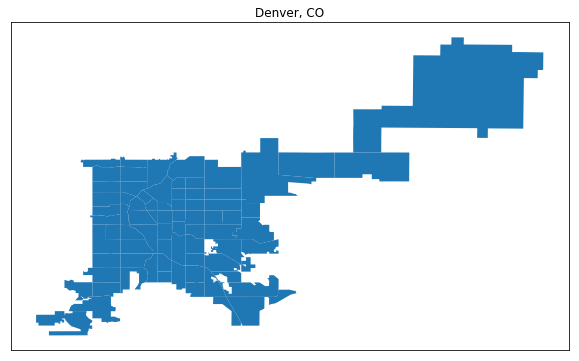

In [42]:
gdf_denver.plot(figsize=(10,8))
plt.title('Denver, CO')
plt.xticks([])
plt.yticks([])
plt.savefig('Denver_raw.png')
print('SW Corner:',gdf_denver.total_bounds[1],',',gdf_denver.total_bounds[0])
print('NE Corner:',gdf_denver.total_bounds[3],',',gdf_denver.total_bounds[2])

In [43]:
df_denver = pd.DataFrame(columns=['Metro','Neighborhood','Latitude','Longitude'])
df_denver['Neighborhood'] = gdf_denver['NBHD_NAME']
df_denver['Metro'] = 'Denver'
df_denver['Latitude'] = gdf_denver.centroid.y
df_denver['Longitude'] = gdf_denver.centroid.x
df_denver.head()

,Metro,Neighborhood,Latitude,Longitude
0,Denver,Auraria,39.745821,-105.008267
1,Denver,Cory - Merrill,39.690462,-104.949822
2,Denver,Belcaro,39.705044,-104.950477
3,Denver,Washington Park,39.701238,-104.966267
4,Denver,Washington Park West,39.702575,-104.979904


In [44]:
df_atlanta.columns == df_boston.columns

array([ True,  True,  True,  True])

In [45]:
df_atlanta.columns == df_chicago.columns

array([ True,  True,  True,  True])

In [46]:
df_atlanta.columns == df_denver.columns

array([ True,  True,  True,  True])

In [47]:
df_corp = pd.concat([df_boston, df_atlanta, df_chicago, df_denver])
df_corp.shape

(425, 4)

In [48]:
df_corp.groupby('Metro').count()

,Neighborhood,Latitude,Longitude
Metro,,,
Atlanta,244,244,244
Boston,26,26,26
Chicago,77,77,77
Denver,78,78,78


#### Foursquare login info

In [148]:
# Foursquare login info

CLIENT_ID = "You don't need to see his ID." # your Foursquare ID
CLIENT_SECRET = "These aren't the droids you're looking for." # your Foursquare Secret
VERSION = '19770525' # Foursquare API version

print(CLIENT_ID)
print(CLIENT_SECRET)

We don't need to see his ID.
These aren't the droids we're looking for.


#### Function to get venue categories

In [50]:
#from Foursquare Lab
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Function to return venues by neighborhood from Foursquare

In [51]:
def getNearbyVenues(cities, names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for city, name, lat, lng in zip(cities, names, latitudes, longitudes):
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        error_list=pd.DataFrame(columns=['Metro','Neighborhood','Latitude','Longitude'])
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
        except KeyError:
            error_list.append([city, name, lat, lng])
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            city,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Metro',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print('Found {} venues in {} neighborhoods.'.format(nearby_venues.shape[0], len(venues_list)))
    if len(error_list) > 0 :
        print('Errors in the following neighborhoods:')
        print(error_list)
    
    return(nearby_venues)

#### Function to get top x categories per neighborhood

In [52]:
# From NY clustering lab
def return_most_common_venues(row, num_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_venues]

In [53]:
df_corp.shape

(425, 4)

Loop thru neighborhoods and get results from Foursquare

In [54]:
LIMIT = 100
venues_corp = getNearbyVenues(cities = df_corp['Metro'],
                              names=df_corp.Neighborhood,
                                latitudes=df_corp.Latitude,
                                longitudes=df_corp.Longitude,
                                radius=2500)


Found 32171 venues in 425 neighborhoods.


In [55]:
venues_corp.groupby('Metro').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Metro,,,,,,,
Atlanta,15431,15431,15431,15431,15431,15431,15431
Boston,2418,2418,2418,2418,2418,2418,2418
Chicago,7001,7001,7001,7001,7001,7001,7001
Denver,7321,7321,7321,7321,7321,7321,7321


#### Onehot encoding for cluster analysis

In [56]:
onehot_corp = venues_corp[['Metro','Neighborhood']]
onehot_corp = pd.concat([onehot_corp, pd.get_dummies(venues_corp[['Venue Category']], prefix='')], axis=1)
print(onehot_corp.shape)
onehot_corp.head()

(32171, 437)


,Metro,Neighborhood,_ATM,_Accessories Store,_Adult Boutique,_Afghan Restaurant,_African Restaurant,_Airport,_Airport Food Court,_Airport Lounge,...,_Weight Loss Center,_Whisky Bar,_Wine Bar,_Wine Shop,_Winery,_Wings Joint,_Women's Store,_Yoga Studio,_Zoo,_Zoo Exhibit
0,Boston,Roslindale,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Boston,Roslindale,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Boston,Roslindale,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Boston,Roslindale,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boston,Roslindale,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
grouped_corp = onehot_corp.groupby(['Metro','Neighborhood']).mean().reset_index()
print(grouped_corp.shape)
grouped_corp.head(10)

(425, 437)


,Metro,Neighborhood,_ATM,_Accessories Store,_Adult Boutique,_Afghan Restaurant,_African Restaurant,_Airport,_Airport Food Court,_Airport Lounge,...,_Weight Loss Center,_Whisky Bar,_Wine Bar,_Wine Shop,_Winery,_Wings Joint,_Women's Store,_Yoga Studio,_Zoo,_Zoo Exhibit
0,Atlanta,Adair Park,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.020408,0.000000,0.000000,0.0,0.0
1,Atlanta,Adams Park,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.073171,0.000000,0.000000,0.0,0.0
2,Atlanta,Adamsville,0.0,0.0,0.0,0.0,0.0,0.027778,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.055556,0.027778,0.000000,0.0,0.0
3,Atlanta,Almond Park,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.083333,0.000000,0.000000,0.0,0.0
4,Atlanta,Amal Heights,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.0
5,Atlanta,Ansley Park,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.01,0.0,0.000000,0.000000,0.000000,0.0,0.0
6,Atlanta,Arden/Habersham,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.01,0.0,0.000000,0.000000,0.010000,0.0,0.0
7,Atlanta,Ardmore,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.01,0.0,0.000000,0.000000,0.010000,0.0,0.0
8,Atlanta,Argonne Forest,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.010309,0.0,0.0
9,Atlanta,Arlington Estates,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [58]:
grouped_corp.tail(10)

,Metro,Neighborhood,_ATM,_Accessories Store,_Adult Boutique,_Afghan Restaurant,_African Restaurant,_Airport,_Airport Food Court,_Airport Lounge,...,_Weight Loss Center,_Whisky Bar,_Wine Bar,_Wine Shop,_Winery,_Wings Joint,_Women's Store,_Yoga Studio,_Zoo,_Zoo Exhibit
415,Denver,Virginia Village,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.01,0.0,0.00,0.00,0.01,0.00,0.00
416,Denver,Washington Park,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.01,0.00,0.0,0.01,0.00,0.01,0.00,0.00
417,Denver,Washington Park West,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.01,0.00,0.0,0.01,0.00,0.01,0.00,0.00
418,Denver,Washington Virginia Vale,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.00
419,Denver,Wellshire,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.01,0.01,0.00,0.00
420,Denver,West Colfax,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.01,0.0,0.01,0.00,0.01,0.00,0.00
421,Denver,West Highland,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.01,0.01,0.0,0.01,0.00,0.03,0.00,0.00
422,Denver,Westwood,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
423,Denver,Whittier,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.01,0.01,0.03
424,Denver,Windsor,0.02,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.01,0.02,0.00,0.00,0.00


In [62]:
# From NY clustering lab

num_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Metro','Neighborhood']
for ind in np.arange(num_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
sorted_neighborhood_venues = pd.DataFrame(columns=columns)
sorted_neighborhood_venues['Metro'] = grouped_corp['Metro']
sorted_neighborhood_venues['Neighborhood'] = grouped_corp['Neighborhood']

for ind in np.arange(grouped_corp.shape[0]):
    sorted_neighborhood_venues.iloc[ind, 2:] = return_most_common_venues(grouped_corp.iloc[ind, :], num_venues)

sorted_neighborhood_venues.head()

,Metro,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Atlanta,Adair Park,_Gas Station,_Discount Store,_Trail,_Restaurant,_Seafood Restaurant,_Art Gallery,_Park,_Vegetarian / Vegan Restaurant,...,_Southern / Soul Food Restaurant,_Chinese Restaurant,_Fried Chicken Joint,_Grocery Store,_Caribbean Restaurant,_Cosmetics Shop,_Donut Shop,_Art Museum,_Wings Joint,_Fast Food Restaurant
1,Atlanta,Adams Park,_Gas Station,_Wings Joint,_Food,_Seafood Restaurant,_Golf Course,_American Restaurant,_Fast Food Restaurant,_Discount Store,...,_Caribbean Restaurant,_Sandwich Place,_Pizza Place,_Fried Chicken Joint,_Cajun / Creole Restaurant,_Resort,_Nature Preserve,_Shopping Mall,_Stadium,_Convenience Store
2,Atlanta,Adamsville,_Fast Food Restaurant,_Discount Store,_Intersection,_Gas Station,_Wings Joint,_Liquor Store,_Fried Chicken Joint,_Scenic Lookout,...,_Baseball Field,_Laundromat,_Roller Rink,_Food,_Track,_Dessert Shop,_Gym,_Clothing Store,_Convenience Store,_Hotel
3,Atlanta,Almond Park,_Discount Store,_Gas Station,_Construction & Landscaping,_Pharmacy,_Scenic Lookout,_Other Great Outdoors,_Chinese Restaurant,_Seafood Restaurant,...,_Farm,_Electronics Store,_Financial or Legal Service,_Drive-in Theater,_Filipino Restaurant,_Drugstore,_Field,_Dry Cleaner,_Eastern European Restaurant,_Empanada Restaurant
4,Atlanta,Amal Heights,_Gas Station,_Seafood Restaurant,_Sandwich Place,_Park,_Thrift / Vintage Store,_Discount Store,_Flea Market,_Music Venue,...,_Non-Profit,_Caribbean Restaurant,_Fish & Chips Shop,_Coffee Shop,_Baseball Field,_Dog Run,_Chinese Restaurant,_Trail,_Diner,_Paintball Field


In [63]:
sorted_neighborhood_venues.tail()

,Metro,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
420,Denver,West Colfax,_Mexican Restaurant,_Coffee Shop,_Brewery,_Pizza Place,_Theme Park,_Park,_Convenience Store,_Circus,...,_Italian Restaurant,_Museum,_Sporting Goods Shop,_Restaurant,_Salon / Barbershop,_Breakfast Spot,_Seafood Restaurant,_Bar,_Football Stadium,_Taco Place
421,Denver,West Highland,_Mexican Restaurant,_Coffee Shop,_Pizza Place,_Brewery,_Breakfast Spot,_Italian Restaurant,_Park,_Yoga Studio,...,_New American Restaurant,_Taco Place,_Burger Joint,_Vegetarian / Vegan Restaurant,_Restaurant,_Liquor Store,_Café,_Ice Cream Shop,_Bakery,_American Restaurant
422,Denver,Westwood,_Mexican Restaurant,_Vietnamese Restaurant,_Convenience Store,_Dim Sum Restaurant,_Grocery Store,_Fast Food Restaurant,_Discount Store,_Marijuana Dispensary,...,_Sandwich Place,_American Restaurant,_Thai Restaurant,_Pharmacy,_Coffee Shop,_Liquor Store,_Taco Place,_Fried Chicken Joint,_Nightclub,_Mobile Phone Shop
423,Denver,Whittier,_Brewery,_Coffee Shop,_American Restaurant,_Burger Joint,_Bar,_Pizza Place,_Café,_Bakery,...,_Zoo Exhibit,_Ice Cream Shop,_Gastropub,_Sandwich Place,_Music Venue,_Breakfast Spot,_Cocktail Bar,_Italian Restaurant,_Bike Shop,_Butcher
424,Denver,Windsor,_Coffee Shop,_Liquor Store,_Grocery Store,_Mexican Restaurant,_Sandwich Place,_Ice Cream Shop,_Italian Restaurant,_Fast Food Restaurant,...,_Bar,_Noodle House,_Cosmetics Shop,_Park,_Pet Store,_Pizza Place,_Burger Joint,_Sports Bar,_Supplement Shop,_ATM


In [64]:
from sklearn.cluster import KMeans

In [65]:
clustering_corp = grouped_corp.drop(['Metro','Neighborhood'],1)
clustering_corp.head()


,_ATM,_Accessories Store,_Adult Boutique,_Afghan Restaurant,_African Restaurant,_Airport,_Airport Food Court,_Airport Lounge,_Airport Service,_Airport Terminal,...,_Weight Loss Center,_Whisky Bar,_Wine Bar,_Wine Shop,_Winery,_Wings Joint,_Women's Store,_Yoga Studio,_Zoo,_Zoo Exhibit
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.020408,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.073171,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.027778,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.055556,0.027778,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.083333,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [66]:
len(grouped_corp['Neighborhood'].unique())

422

### Testing effect of different random state seeds

In [67]:
myseed = 3
print('Ratio of neighborhoods:')
print('')
for k in range(10):
    print('With',k+1,'clusters:')
    KMns = KMeans(n_clusters=k+1, random_state=myseed).fit(clustering_corp)
    clustercount=pd.Series(KMns.labels_).value_counts()
    clustercountn=pd.Series(KMns.labels_).value_counts(normalize=True)
    print(pd.concat([clustercount,clustercountn], axis=1))
    print('')


Ratio of neighborhoods:

With 1 clusters:
     0    1
0  425  1.0

With 2 clusters:
     0         1
0  280  0.658824
1  145  0.341176

With 3 clusters:
     0         1
0  225  0.529412
2  110  0.258824
1   90  0.211765

With 4 clusters:
     0         1
1  227  0.534118
0  109  0.256471
2   77  0.181176
3   12  0.028235

With 5 clusters:
     0         1
1  229  0.538824
0  103  0.242353
2   64  0.150588
4   25  0.058824
3    4  0.009412

With 6 clusters:
     0         1
1  162  0.381176
4   99  0.232941
2   77  0.181176
0   75  0.176471
3    8  0.018824
5    4  0.009412

With 7 clusters:
     0         1
3  147  0.345882
1   96  0.225882
0   82  0.192941
2   72  0.169412
4   16  0.037647
6    8  0.018824
5    4  0.009412

With 8 clusters:
     0         1
3  130  0.305882
2   95  0.223529
0   72  0.169412
5   49  0.115294
1   40  0.094118
7   19  0.044706
6   16  0.037647
4    4  0.009412

With 9 clusters:
     0         1
5  115  0.270588
1   75  0.176471
0   69  0.162353
2   61  

In [68]:
myseed = 4
print('Ratio of neighborhoods:')
print('')
for k in range(10):
    print('With',k+1,'clusters:')
    KMns = KMeans(n_clusters=k+1, random_state=myseed).fit(clustering_corp)
    clustercount=pd.Series(KMns.labels_).value_counts()
    clustercountn=pd.Series(KMns.labels_).value_counts(normalize=True)
    print(pd.concat([clustercount,clustercountn], axis=1))
    print('')


Ratio of neighborhoods:

With 1 clusters:
     0    1
0  425  1.0

With 2 clusters:
     0         1
0  280  0.658824
1  145  0.341176

With 3 clusters:
     0         1
0  224  0.527059
1  111  0.261176
2   90  0.211765

With 4 clusters:
     0         1
2  217  0.510588
0  101  0.237647
1   55  0.129412
3   52  0.122353

With 5 clusters:
     0         1
1  226  0.531765
4  109  0.256471
2   76  0.178824
0   10  0.023529
3    4  0.009412

With 6 clusters:
     0         1
2  221  0.520000
3  100  0.235294
4   65  0.152941
1   26  0.061176
0    9  0.021176
5    4  0.009412

With 7 clusters:
     0         1
1  111  0.261176
2   99  0.232941
5   71  0.167059
3   60  0.141176
0   54  0.127059
6   26  0.061176
4    4  0.009412

With 8 clusters:
     0         1
5  195  0.458824
1   76  0.178824
2   75  0.176471
7   31  0.072941
0   19  0.044706
4   16  0.037647
3    9  0.021176
6    4  0.009412

With 9 clusters:
     0         1
1  126  0.296471
8   88  0.207059
7   86  0.202353
2   36  

In [69]:
myseed = 5
print('Ratio of neighborhoods:')
print('')
for k in range(10):
    print('With',k+1,'clusters:')
    KMns = KMeans(n_clusters=k+1, random_state=myseed).fit(clustering_corp)
    clustercount=pd.Series(KMns.labels_).value_counts()
    clustercountn=pd.Series(KMns.labels_).value_counts(normalize=True)
    print(pd.concat([clustercount,clustercountn], axis=1))
    print('')


Ratio of neighborhoods:

With 1 clusters:
     0    1
0  425  1.0

With 2 clusters:
     0         1
0  280  0.658824
1  145  0.341176

With 3 clusters:
     0         1
1  281  0.661176
0  140  0.329412
2    4  0.009412

With 4 clusters:
     0         1
1  221  0.520000
2  113  0.265882
0   87  0.204706
3    4  0.009412

With 5 clusters:
     0         1
0  224  0.527059
2  111  0.261176
1   78  0.183529
4    8  0.018824
3    4  0.009412

With 6 clusters:
     0         1
0  176  0.414118
4   78  0.183529
3   69  0.162353
2   68  0.160000
1   30  0.070588
5    4  0.009412

With 7 clusters:
     0         1
0  219  0.515294
2   90  0.211765
4   53  0.124706
6   27  0.063529
3   19  0.044706
1   13  0.030588
5    4  0.009412

With 8 clusters:
     0         1
3  145  0.341176
0   96  0.225882
2   57  0.134118
7   48  0.112941
5   39  0.091765
6   20  0.047059
1   16  0.037647
4    4  0.009412

With 9 clusters:
     0         1
7  105  0.247059
2   72  0.169412
0   66  0.155294
4   44  

Let's go with 4 clusters and random state seed = 4.  Seems to give a good split.

In [70]:
k=4
myseed=4
KMns = KMeans(n_clusters=k, random_state=myseed).fit(clustering_corp)
clustered_corp = df_corp[['Metro','Neighborhood','Latitude','Longitude']].sort_values(by=['Metro','Neighborhood'])
clustered_corp['Cluster_Label'] = KMns.labels_
clustered_corp = clustered_corp.join(sorted_neighborhood_venues.set_index(['Metro','Neighborhood']), on=['Metro','Neighborhood'])
clustered_corp.head()


,Metro,Neighborhood,Latitude,Longitude,Cluster_Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
4,Atlanta,Adair Park,33.731172,-84.410837,1,_Gas Station,_Discount Store,_Trail,_Restaurant,_Seafood Restaurant,...,_Southern / Soul Food Restaurant,_Chinese Restaurant,_Fried Chicken Joint,_Grocery Store,_Caribbean Restaurant,_Cosmetics Shop,_Donut Shop,_Art Museum,_Wings Joint,_Fast Food Restaurant
100,Atlanta,Adams Park,33.713948,-84.461682,3,_Gas Station,_Wings Joint,_Food,_Seafood Restaurant,_Golf Course,...,_Caribbean Restaurant,_Sandwich Place,_Pizza Place,_Fried Chicken Joint,_Cajun / Creole Restaurant,_Resort,_Nature Preserve,_Shopping Mall,_Stadium,_Convenience Store
170,Atlanta,Adamsville,33.758777,-84.503102,3,_Fast Food Restaurant,_Discount Store,_Intersection,_Gas Station,_Wings Joint,...,_Baseball Field,_Laundromat,_Roller Rink,_Food,_Track,_Dessert Shop,_Gym,_Clothing Store,_Convenience Store,_Hotel
36,Atlanta,Almond Park,33.786544,-84.462247,3,_Discount Store,_Gas Station,_Construction & Landscaping,_Pharmacy,_Scenic Lookout,...,_Farm,_Electronics Store,_Financial or Legal Service,_Drive-in Theater,_Filipino Restaurant,_Drugstore,_Field,_Dry Cleaner,_Eastern European Restaurant,_Empanada Restaurant
42,Atlanta,Amal Heights,33.708803,-84.398715,1,_Gas Station,_Seafood Restaurant,_Sandwich Place,_Park,_Thrift / Vintage Store,...,_Non-Profit,_Caribbean Restaurant,_Fish & Chips Shop,_Coffee Shop,_Baseball Field,_Dog Run,_Chinese Restaurant,_Trail,_Diner,_Paintball Field


In [71]:
clustered_corp.groupby(['Cluster_Label','Metro']).count()

Neighborhood  Latitude  Longitude  \
Cluster_Label Metro                                        
0             Atlanta            40        40         40   
              Boston              3         3          3   
              Chicago            43        43         43   
              Denver             15        15         15   
1             Atlanta            54        54         54   
              Boston              1         1          1   
2             Atlanta            98        98         98   
              Boston             22        22         22   
              Chicago            34        34         34   
              Denver             63        63         63   
3             Atlanta            52        52         52   

                       1st Most Common Venue  2nd Most Common Venue  \
Cluster_Label Metro                                                   
0             Atlanta                     40                     40   
              Boston                       3                      3   
              Chicago                     43                     43   
              Denver                      15                     15   
1             Atlanta                     54                     54   
              Boston                       1                      1   
2             Atlanta                     98                     98   
              Boston                      22                     22   
              Chicago                     34                     34   
              Denver                      63                     63   
3             Atlanta                     52                     52   

                       3rd Most Common Venue  4th Most Common Venue  \
Cluster_Label Metro                                                   
0             Atlanta                     40                     40   
              Boston                       3                      3   
              Chicago                     43                     43   
              Denver                      15                     15   
1             Atlanta                     54                     54   
              Boston                       1                      1   
2             Atlanta                     98                     98   
              Boston                      22                     22   
              Chicago                     34                     34   
              Denver                      63                     63   
3             Atlanta                     52                     52   

                       5th Most Common Venue  6th Most Common Venue  \
Cluster_Label Metro                                                   
0             Atlanta                     40                     40   
              Boston                       3                      3   
              Chicago                     43                     43   
              Denver                      15                     15   
1             Atlanta                     54                     54   
              Boston                       1                      1   
2             Atlanta                     98                     98   
              Boston                      22                     22   
              Chicago                     34                     34   
              Denver                      63                     63   
3             Atlanta                     52                     52   

                       7th Most Common Venue           ...            \
Cluster_Label Metro                                    ...             
0             Atlanta                     40           ...             
              Boston                       3           ...             
              Chicago                     43           ...             
              Denver                      15           ...             
1             Atlanta                 

In [ ]:
#split up the clusters
cluster_1 = clustered_corp.loc[clustered_corp['Cluster_Label']==0, clustered_corp.columns[[0,1,2] + list(range(5,clustered_corp.shape[1]))]].reset_index(drop=True)
cluster_2 = clustered_corp.loc[clustered_corp['Cluster_Label']==1, clustered_corp.columns[[0,1,2] + list(range(5,clustered_corp.shape[1]))]].reset_index(drop=True)
cluster_3 = clustered_corp.loc[clustered_corp['Cluster_Label']==2, clustered_corp.columns[[0,1,2] + list(range(5,clustered_corp.shape[1]))]].reset_index(drop=True)
cluster_4 = clustered_corp.loc[clustered_corp['Cluster_Label']==3, clustered_corp.columns[[0,1,2] + list(range(5,clustered_corp.shape[1]))]].reset_index(drop=True)
cluster_5 = clustered_corp.loc[clustered_corp['Cluster_Label']==4, clustered_corp.columns[[0,1,2] + list(range(5,clustered_corp.shape[1]))]].reset_index(drop=True)

In [ ]:
print('Cluster 1:',len(cluster_1))
print('Cluster 2:',len(cluster_2))
print('Cluster 3:',len(cluster_3))
print('Cluster 4:',len(cluster_4))
print('Cluster 5:',len(cluster_5))

### Top Categories per cluster

In [ ]:
clustered_corp[clustered_corp['Cluster_Label']==0][38:44]

In [72]:
for c in np.arange(k):
    df = clustered_corp[clustered_corp['Cluster_Label']==c].reset_index(drop=True)
    ven_cat = pd.Series()
    ven_score = pd.Series()

    for x in range(5,df.shape[1]):
        ven_cat = pd.concat([ven_cat,df[df.columns[x]]])
        ven_score = pd.concat([ven_score,pd.Series(np.zeros(df.shape[0])+(df.shape[1]-x)/len(df))])

    cluster_score = pd.concat([ven_cat,ven_score],axis=1)
    cluster_score.rename(columns={0:'Category',1:'Score'}, inplace=True)
    print('Cluster',c,':',len(df), 'neighborhoods')
    print(cluster_score.groupby('Category').sum().sort_values(by='Score', ascending=False)[:10])
    print('')

Cluster 0 : 101 neighborhoods
                           Score
Category                        
_Fast Food Restaurant  14.960396
_Sandwich Place        13.108911
_Discount Store        12.198020
_Pizza Place           10.811881
_Grocery Store         10.089109
_Mexican Restaurant     9.475248
_Park                   8.198020
_Pharmacy               7.376238
_Chinese Restaurant     5.712871
_Coffee Shop            4.722772

Cluster 1 : 55 neighborhoods
                           Score
Category                        
_Park                  16.963636
_Gas Station           15.563636
_Discount Store        12.254545
_Seafood Restaurant    11.927273
_Trail                  9.490909
_Fast Food Restaurant   7.509091
_Sandwich Place         6.490909
_Liquor Store           6.181818
_Fried Chicken Joint    4.563636
_Chinese Restaurant     3.636364

Cluster 2 : 217 neighborhoods
                          Score
Category                       
_Coffee Shop          13.078341
_Pizza Place         

In [73]:
print(gdf_atlanta.columns)
gdf_atlanta.head(1)

Index(['OBJECTID', 'LOCALID', 'NAME', 'GEOTYPE', 'FULLFIPS', 'LEGALAREA',
       'EFFECTDATE', 'ENDDATE', 'SRCREF', 'ACRES', 'SQMILES', 'OLDNAME', 'NPU',
       'CREATED_USER', 'CREATED_DATE', 'LAST_EDITED_USER', 'LAST_EDITED_DATE',
       'GLOBALID', 'geometry'],
      dtype='object')


,OBJECTID,LOCALID,NAME,GEOTYPE,FULLFIPS,LEGALAREA,EFFECTDATE,ENDDATE,SRCREF,ACRES,SQMILES,OLDNAME,NPU,CREATED_USER,CREATED_DATE,LAST_EDITED_USER,LAST_EDITED_DATE,GLOBALID,geometry
0,148,None,Atlanta University Center,Neighborhood,None,None,None,None,None,331.57,0.52,Atlanta University,T,None,None,GIS,2018-05-15T13:24:10,{D6CAF694-B83F-4CB9-B351-CA3E3145D0C7},POLYGON ((-84.40279850020488 33.75464936754819...


In [74]:
print(gdf_boston.columns)
gdf_boston.head(1)

Index(['OBJECTID', 'Name', 'Acres', 'Neighborhood_ID', 'SqMiles',
       'ShapeSTArea', 'ShapeSTLength', 'geometry'],
      dtype='object')


,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,geometry
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,(POLYGON ((-71.12592717485386 42.2720131079574...


In [75]:
print(gdf_chicago.columns)
gdf_chicago.head(1)

Index(['community', 'area', 'shape_area', 'perimeter', 'area_num_1',
       'area_numbe', 'comarea_id', 'comarea', 'shape_len', 'geometry'],
      dtype='object')


,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,(POLYGON ((-87.60914087617894 41.8446925026539...


In [76]:
print(gdf_denver.columns)
gdf_denver.head(1)

Index(['NBHD_ID', 'NBHD_NAME', 'TYPOLOGY', 'NOTES', 'geometry'], dtype='object')


,NBHD_ID,NBHD_NAME,TYPOLOGY,NOTES,geometry
0,2,Auraria,None,None,POLYGON ((-105.0004215834868 39.74551988381927...


In [81]:
gdf_corp = gpd.GeoDataFrame(columns=['Metro','Neighborhood','geometry'])
tdf = gpd.GeoDataFrame(columns=['Metro','Neighborhood','geometry'])
tdf['Neighborhood'] = gdf_atlanta['NAME']
tdf['geometry'] = gdf_atlanta['geometry']
tdf['Metro'] = 'Atlanta'
gdf_corp = pd.concat([gdf_corp,tdf])

tdf = gpd.GeoDataFrame(columns=['Metro','Neighborhood','geometry'])
tdf['Neighborhood'] = gdf_boston['Name']
tdf['geometry'] = gdf_boston['geometry']
tdf['Metro'] = 'Boston'
gdf_corp = pd.concat([gdf_corp,tdf])

tdf = gpd.GeoDataFrame(columns=['Metro','Neighborhood','geometry'])
tdf['Neighborhood'] = gdf_chicago['community']
tdf['geometry'] = gdf_chicago['geometry']
tdf['Metro'] = 'Chicago'
gdf_corp = pd.concat([gdf_corp,tdf])

tdf = gpd.GeoDataFrame(columns=['Metro','Neighborhood','geometry'])
tdf['Neighborhood'] = gdf_denver['NBHD_NAME']
tdf['geometry'] = gdf_denver['geometry']
tdf['Metro'] = 'Denver'
gdf_corp = pd.concat([gdf_corp,tdf])
tdf = gpd.GeoDataFrame(columns=['Metro','Neighborhood','geometry'])

gdf_corp.shape

(425, 3)

In [83]:
len(tdf)

0

In [84]:
gdf_corp.head()

,Metro,Neighborhood,geometry
0,Atlanta,Atlanta University Center,POLYGON ((-84.40279850020488 33.75464936754819...
1,Atlanta,Hunter Hills,POLYGON ((-84.43297031384785 33.76355789428761...
2,Atlanta,Bankhead,POLYGON ((-84.41735255481318 33.77561201010109...
3,Atlanta,English Avenue,POLYGON ((-84.41445356588959 33.78125523391933...
4,Atlanta,Adair Park,POLYGON ((-84.40818952563748 33.73928574884914...


In [85]:
gdf_corp = gdf_corp.join(clustered_corp.set_index(['Metro','Neighborhood']), on=['Metro','Neighborhood'])
gdf_corp.head()

,Metro,Neighborhood,geometry,Latitude,Longitude,Cluster_Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Atlanta,Atlanta University Center,POLYGON ((-84.40279850020488 33.75464936754819...,33.749477,-84.411256,2,_Aquarium,_Park,_Museum,_Art Gallery,...,_Southern / Soul Food Restaurant,_Vegetarian / Vegan Restaurant,_Sports Club,_BBQ Joint,_Caribbean Restaurant,_Fast Food Restaurant,_Art Museum,_Music Venue,_Sandwich Place,_Gym
1,Atlanta,Hunter Hills,POLYGON ((-84.43297031384785 33.76355789428761...,33.758731,-84.431230,1,_Gas Station,_Trail,_Park,_Discount Store,...,_Art Museum,_American Restaurant,_Sandwich Place,_Seafood Restaurant,_Cosmetics Shop,_Wings Joint,_Food & Drink Shop,_Athletics & Sports,_Beer Bar,_New American Restaurant
2,Atlanta,Bankhead,POLYGON ((-84.41735255481318 33.77561201010109...,33.769014,-84.424524,2,_Coffee Shop,_Gym,_American Restaurant,_Furniture / Home Store,...,_Bar,_Mexican Restaurant,_Cosmetics Shop,_Men's Store,_Restaurant,_Seafood Restaurant,_Ice Cream Shop,_Gastropub,_Burger Joint,_Southern / Soul Food Restaurant
3,Atlanta,English Avenue,POLYGON ((-84.41445356588959 33.78125523391933...,33.770709,-84.410995,2,_Aquarium,_Coffee Shop,_American Restaurant,_Italian Restaurant,...,_Southern / Soul Food Restaurant,_Steakhouse,_Fast Food Restaurant,_Hot Dog Joint,_Theater,_Seafood Restaurant,_Bar,_Music Venue,_Restaurant,_Ice Cream Shop
4,Atlanta,Adair Park,POLYGON ((-84.40818952563748 33.73928574884914...,33.731172,-84.410837,1,_Gas Station,_Discount Store,_Trail,_Restaurant,...,_Southern / Soul Food Restaurant,_Chinese Restaurant,_Fried Chicken Joint,_Grocery Store,_Caribbean Restaurant,_Cosmetics Shop,_Donut Shop,_Art Museum,_Wings Joint,_Fast Food Restaurant


In [86]:
gdf_corp.drop(columns=['Latitude','Longitude'],inplace=True)
gdf_corp.drop(columns=gdf_corp.columns[4:],inplace=True)
gdf_corp.head()

,Metro,Neighborhood,geometry,Cluster_Label
0,Atlanta,Atlanta University Center,POLYGON ((-84.40279850020488 33.75464936754819...,2
1,Atlanta,Hunter Hills,POLYGON ((-84.43297031384785 33.76355789428761...,1
2,Atlanta,Bankhead,POLYGON ((-84.41735255481318 33.77561201010109...,2
3,Atlanta,English Avenue,POLYGON ((-84.41445356588959 33.78125523391933...,2
4,Atlanta,Adair Park,POLYGON ((-84.40818952563748 33.73928574884914...,1


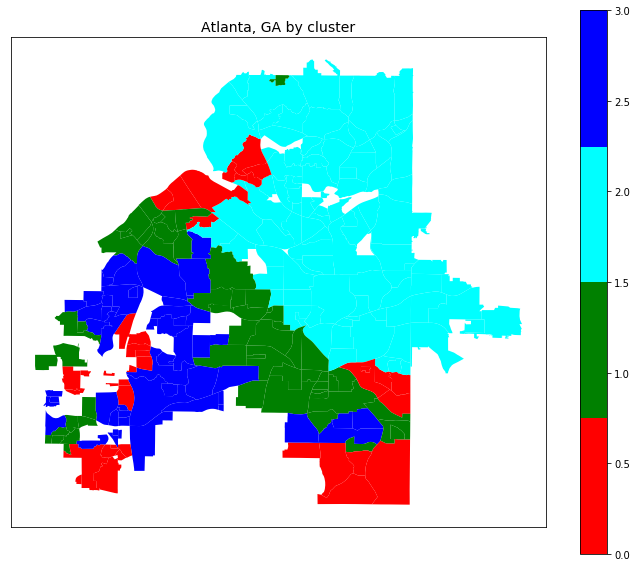

In [103]:
mycmap = mpl.colors.ListedColormap(['red','green','cyan','blue'])
gdf_corp[gdf_corp['Metro']=='Atlanta'].plot(
    figsize=(12,10), 
    column='Cluster_Label',
    cmap=mycmap,
    legend=True)
plt.title('Atlanta, GA by cluster', fontsize=14)
plt.xticks([])
plt.yticks([])
plt.savefig('Atlanta_clustered.png')


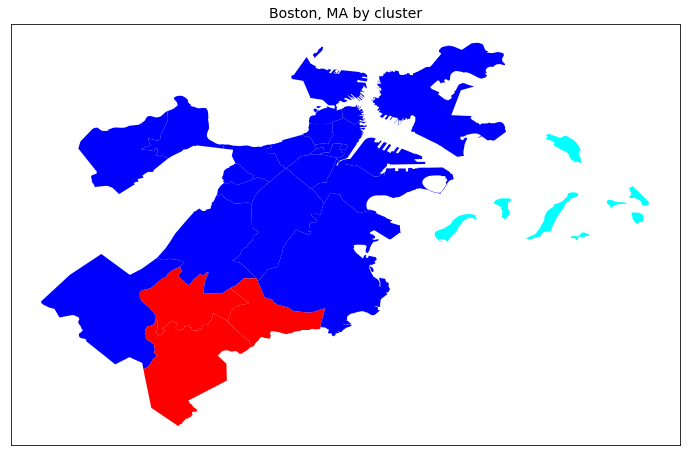

In [104]:
gdf_corp[gdf_corp['Metro']=='Boston'].plot(
    figsize=(12,10), 
    column='Cluster_Label',
    cmap=mycmap,
    )
plt.title('Boston, MA by cluster',fontsize=14)
plt.xticks([])
plt.yticks([])
plt.savefig('Boston_clustered.png')


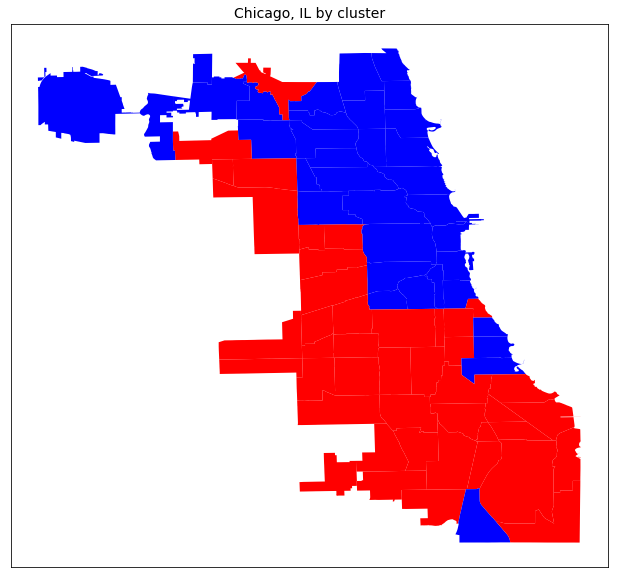

In [106]:
gdf_corp[gdf_corp['Metro']=='Chicago'].plot(
    figsize=(12,10), 
    column='Cluster_Label',
    cmap=mycmap)
plt.title('Chicago, IL by cluster',fontsize=14)
plt.xticks([])
plt.yticks([])
plt.savefig('Chicago_clustered.png')

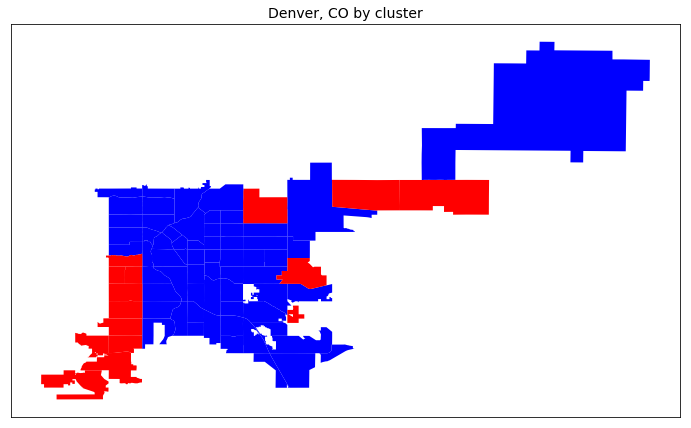

In [109]:
gdf_corp[gdf_corp['Metro']=='Denver'].plot(
    figsize=(12,10), 
    column='Cluster_Label',
    cmap=mycmap)
plt.title('Denver, CO by cluster',fontsize=14)
plt.xticks([])
plt.yticks([])
plt.savefig('Denver_clustered.png')

In [111]:
pd.options.display.max_rows = None

In [113]:
gdf_corp.reset_index(inplace=True)

In [ ]:
gdf_corp[gdf_corp['Cluster_Label']==0][['Metro','Neighborhood']]

In [ ]:
gdf_corp[gdf_corp['Cluster_Label']==1][['Metro','Neighborhood']]

In [ ]:
gdf_corp[gdf_corp['Cluster_Label']==2][['Metro','Neighborhood']]

In [ ]:
atl=gdf_corp[gdf_corp['Cluster_Label']==0][gdf_corp['Metro']=='Atlanta']['Neighborhood']
atl

In [120]:
z=0
atl=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Atlanta'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
bos=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Boston'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
chi=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Chicago'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
den=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Denver'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
neighborhoods0 = pd.concat([atl['Neighborhood'],bos['Neighborhood'],chi['Neighborhood'],den['Neighborhood']],axis=1,ignore_index=True)
neighborhoods0.rename(columns={0:'Atlanta',1:'Boston',2:'Chicago',3:'Denver'}, inplace=True)
neighborhoods0

,Atlanta,Boston,Chicago,Denver
0,Ashley Courts,Hyde Park,ARCHER HEIGHTS,Barnum
1,Ben Hill,Mattapan,ASHBURN,Barnum West
2,Ben Hill Forest,Roslindale,AUBURN GRESHAM,Bear Valley
3,Benteen Park,NaN,AUSTIN,Fort Logan
4,Blair Villa/Poole Creek,NaN,AVALON PARK,Gateway - Green Valley Ranch
5,Bolton,NaN,BELMONT CRAGIN,Harvey Park
6,Brentwood,NaN,BEVERLY,Harvey Park South
7,Carver Hills,NaN,BRIGHTON PARK,Indian Creek
8,Cascade Green,NaN,BURNSIDE,Lowry Field
9,Chosewood Park,NaN,CALUMET HEIGHTS,Mar Lee


In [121]:
z=1
atl=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Atlanta'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
bos=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Boston'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
chi=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Chicago'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
den=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Denver'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
neighborhoods1 = pd.concat([atl['Neighborhood'],bos['Neighborhood'],chi['Neighborhood'],den['Neighborhood']],axis=1,ignore_index=True)
neighborhoods1.rename(columns={0:'Atlanta',1:'Boston',2:'Chicago',3:'Denver'}, inplace=True)
neighborhoods1

,Atlanta,Boston,Chicago,Denver
0,Adair Park,Harbor Islands,NaN,NaN
1,Amal Heights,NaN,NaN,NaN
2,Ashview Heights,NaN,NaN,NaN
3,Atlanta Industrial Park,NaN,NaN,NaN
4,Bankhead Courts,NaN,NaN,NaN
5,Bankhead/Bolton,NaN,NaN,NaN
6,Ben Hill Terrace,NaN,NaN,NaN
7,Betmar LaVilla,NaN,NaN,NaN
8,Bolton Hills,NaN,NaN,NaN
9,Boulder Park,NaN,NaN,NaN


In [122]:
z=2
atl=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Atlanta'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
bos=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Boston'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
chi=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Chicago'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
den=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Denver'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
neighborhoods2 = pd.concat([atl['Neighborhood'],bos['Neighborhood'],chi['Neighborhood'],den['Neighborhood']],axis=1,ignore_index=True)
neighborhoods2.rename(columns={0:'Atlanta',1:'Boston',2:'Chicago',3:'Denver'}, inplace=True)
neighborhoods2

,Atlanta,Boston,Chicago,Denver
0,Ansley Park,Allston,ALBANY PARK,Athmar Park
1,Arden/Habersham,Back Bay,ARMOUR SQUARE,Auraria
2,Ardmore,Bay Village,AVONDALE,Baker
3,Argonne Forest,Beacon Hill,BRIDGEPORT,Belcaro
4,Atkins Park,Brighton,DOUGLAS,Berkeley
5,Atlanta University Center,Charlestown,EDGEWATER,CBD
6,Atlantic Station,Chinatown,EDISON PARK,Capitol Hill
7,Bankhead,Dorchester,HERMOSA,Chaffee Park
8,Berkeley Park,Downtown,HUMBOLDT PARK,Cheesman Park
9,Blandtown,East Boston,HYDE PARK,Cherry Creek


In [123]:
z=3
atl=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Atlanta'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
bos=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Boston'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
chi=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Chicago'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
den=gdf_corp[gdf_corp['Cluster_Label']==z][gdf_corp['Metro']=='Denver'][['Neighborhood']].sort_values(by='Neighborhood').reset_index()
neighborhoods3 = pd.concat([atl['Neighborhood'],bos['Neighborhood'],chi['Neighborhood'],den['Neighborhood']],axis=1,ignore_index=True)
neighborhoods3.rename(columns={0:'Atlanta',1:'Boston',2:'Chicago',3:'Denver'}, inplace=True)
neighborhoods3

,Atlanta,Boston,Chicago,Denver
0,Adams Park,NaN,NaN,NaN
1,Adamsville,NaN,NaN,NaN
2,Almond Park,NaN,NaN,NaN
3,Arlington Estates,NaN,NaN,NaN
4,Audobon Forest,NaN,NaN,NaN
5,Audobon Forest West,NaN,NaN,NaN
6,Baker Hills,NaN,NaN,NaN
7,Bakers Ferry,NaN,NaN,NaN
8,Beecher Hills,NaN,NaN,NaN
9,Ben Hill Acres,NaN,NaN,NaN


In [126]:
pd.reset_option('max_rows')